# Regresión por mínimos cuadrados
La toma de datos durante una experimentación o durante un análisis se ve siempre afectada por los **errores** que puedan existir debido a **variables que no podemos controlar** y de las cuales desconocemos su comportamiento. Los datos resultantes podrían presentar **errores inerentes al fenómeno** que estudiamos y por lo tanto no siguen **la tendencia** que se esperaría. Es por ello que, en lugar de utilizar una interpolación entre los puntos, se requiere de **una aproximación** $b$ajo una tendencia que esté de acuerdo al modelo matemático que describa el fenómeno observado.$$

## Regresión lineal
A uno de los **métodos** para ajusta el modelo aproximado a los datos obtenidos se le conoce como **regresión por mínimos cuadrados**. El ejemplo mas sencillo se da cuando queremos ajustar la tendencia de una linea recta a un conjunto de datos, en este caso al método se le conoce como **regresión lineal**. 
Supongmos que queremos ajustar una linea recta a los puntos $(x_0,y_0),\,(x_1,y_1),\,...\,,\,(x_n,y_n)$ en un fenómeno donde mediomos una variable  y controlamos una variable . La expresión que mejor describe una tendencia lineal es de la forma 
$$y=a_0+a_1\,x+e$$
 donde $a_0$ y $a_1$ son la ordenada al origen y la pendiende, respectivamente; y  es la diferencia entre el modelo lineal y el conjunto de datos. También se puede entender como la diferencia del valor real con el valor aproximado por la recta. Es decri, para conjunto de datos de la forma $(x_i,y_i)$, estará asociado un error $e_i$ que será la diferencia para "alcanzar" el punto sobre una recta que contiene a todos los puntos promedio de la froma $(\hat{x},\hat{y})$.

<center>
    <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/raw/498db9030cf94ace36e12014acb45b41873494b9/Clases/Imagenes/Linear-regression.png" width="300">
</center>

De las diferentes formas de estimar este error, existe una a partir de la cual podemos obtener una única recta para ese conjunto de datos, y se basa en considerar la suma del cuadrado de todos los errores,
$$S_r=\sum_{i=1}^ne_i^2=\sum_{i=1}^n(y_i-\hat{y_i})^2=\sum_{i=1}^n(y_i-a_0-a_1x_i)^2$$
para que de esta forma, las distancias entre las mediciones  y el modelo lineal , puedan ser minimizada.
Debido a que buscamos una única recta cuya distancia sea mínima a todos los puntos, la ecuación antenrior se minimiza con respecto a los coeficientes $a_0$ y $a_1$, es decir, las derivadas parciales con respecto a estas variables deben ser cero. De estas derivadas se obtiene un sistema de dos ecuaciones a partir de las cuales se obtienen los valores para cada constante.
$$\frac{\partial S_r}{\partial a_0}=\sum y_i-\sum a_0-\sum a_1x_i=0$$
$$\frac{\partial S_r}{\partial a_1}=\sum y_ix_i-\sum a_0x_i-\sum a_1x_i^2=0$$
de donde 
$$a_0=\bar{y}-a_1\bar{x}$$
$$a_1=\frac{n\sum x_iy_i-\sum x_i\sum y_i}{n\sum x_i^2-(\sum x_i)^2}$$


Usando la función de ajuste de regresión lineal

Ecuación de la recta: y = 0.0714 + 0.8393x
Coeficiente a (intercept): 0.0714
Coeficiente b (pendiente): 0.8393
Coeficiente de determinación R²: 0.8683
Predicción para x=8: y = 6.7857


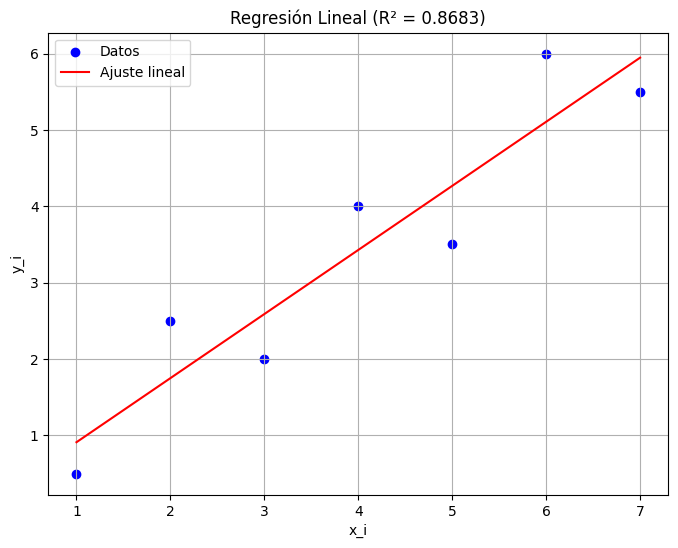

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
x_lineal = np.array([1, 2, 3, 4, 5, 6, 7])
y_lineal = np.array([0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5])

# Cálculo de las sumas necesarias
n = len(x_lineal)
sum_x = np.sum(x_lineal)
sum_y = np.sum(y_lineal)
sum_xy = np.sum(x_lineal * y_lineal)
sum_x2 = np.sum(x_lineal ** 2)

# Cálculo de los coeficientes
b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
a = (sum_y - b * sum_x) / n

# Predicciones
y_pred = a + b * x_lineal

# Cálculo del coeficiente de determinación R²
SS_res = np.sum((y_lineal - y_pred)**2)  # Suma de cuadrados de los residuos
SS_tot = np.sum((y_lineal - np.mean(y_lineal))**2)  # Suma de cuadrados total
R2 = 1 - (SS_res / SS_tot)  # Coeficiente de determinación

# Mostrar resultados
print(f'Ecuación de la recta: y = {a:.4f} + {b:.4f}x')
print(f'Coeficiente a (intercept): {a:.4f}')
print(f'Coeficiente b (pendiente): {b:.4f}')
print(f'Coeficiente de determinación R²: {R2:.4f}')

# Predicción para x=8 como ejemplo
x_pred = 8
y_pred = a + b * x_pred
print(f'Predicción para x={x_pred}: y = {y_pred:.4f}')

# Gráfico de los datos y la recta de regresión
plt.figure(figsize=(8, 6))
plt.scatter(x_lineal, y_lineal, c='blue', label='Datos')  # Diagrama de dispersión
plt.plot(x_lineal, a + b*x_lineal, 'r', label='Ajuste lineal')  # Línea de regresión
plt.xlabel('x_i')
plt.ylabel('y_i')
plt.title(f'Regresión Lineal (R² = {R2:.4f})')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

En virtud de que la linea recta representa una media para todos los valores alrededro de ella, la desviación estandar de esta acumulación de puntos alerededor de la recta se obtiene de 
$$s=\sqrt{\frac{S_r}{n-2}}$$
el error estandar para los datos usados sin considerar las estimaciones de los coeficientes  y  debido a que estos corresponde a dos de los  puntos usados en la estimación.

Otra forma para determinar la efectividad del ajuste se obtiene de comparar $S_t=\sum(y_i-\bar{y})^2$ la suma del cuadroado de las diferencias entre el valor  de cada uno de los puntos con el promedio de estos contra los residuos del ajuste definidos como $S_r=\sum(y_i-a_0-a_1x_i)^2$. A este parámetro se le conoce como el **coeficiente de determinación** y se define como
$$r^2=\frac{S_t-S_r}{S_t}$$
Este valor está **acotado entre 0 y 1** de tal forma que si el ajuste de la regresión lineal "pasa" sobre todos los puntos entonces no existiran residuos, es decir $S_r=0$ y por lo tanto $r^2=1$, mientras que si los residuos corresponden a una exactamente a la diferencia de la cada punto $y_i$ y la media $\bar{y}$, entonces $S_t=S_r$ y por lo tanto $r^2=0$, es decir, no podemos respresentar la tendencia de nuestros datos por medio de una linea recta.

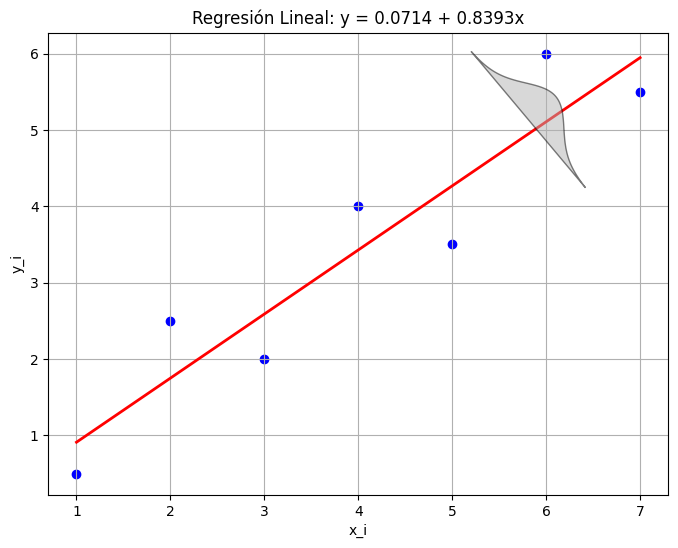

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos proporcionados
x_lineal = np.array([1, 2, 3, 4, 5, 6, 7])
y_lineal = np.array([0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5])

# 1. Regresión lineal
p = np.polyfit(x_lineal, y_lineal, 1)
y_pred = np.polyval(p, x_lineal)
residuos = y_lineal - y_pred
sigma = np.std(residuos)

# 2. Crear figura principal
fig, main_ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')

# Gráfica principal
main_ax.scatter(x_lineal, y_lineal, color='blue', label='Datos')
main_ax.plot(x_lineal, y_pred, 'r-', linewidth=2, label='Ajuste lineal')
main_ax.set_title(f'Regresión Lineal: y = {p[1]:.4f} + {p[0]:.4f}x')
main_ax.set_xlabel('x_i')
main_ax.set_ylabel('y_i')
main_ax.grid(True)
# main_ax.legend(loc='northwest')
main_ax.axis('tight')

# 3. Crear distribución gaussiana para el inset
x_gauss = np.linspace(-3*sigma, 3*sigma, 200)
y_gauss = norm.pdf(x_gauss, 0, sigma)
y_gauss = y_gauss/y_gauss.max()*0.8  # Normalizar altura

# 4. Crear inset rotado
inset_pos = [0.6, 0.61, 0.25, 0.25]  # Posición y tamaño del inset
inset_ax = fig.add_axes(inset_pos)

# Función para rotar la curva
def rotate_curve(x, y, theta):
    theta_rad = np.deg2rad(theta)
    x_rot = x * np.cos(theta_rad) - y * np.sin(theta_rad)
    y_rot = x * np.sin(theta_rad) + y * np.cos(theta_rad)
    return x_rot, y_rot

# Rotar y graficar la gaussiana (30 grados)
theta = -np.degrees(np.arctan(p[0])) - 10  # Ángulo de rotación en grados
x_rot, y_rot = rotate_curve(x_gauss, y_gauss, theta)

inset_ax.fill(x_rot, y_rot, color=[0.7, 0.7, 0.7], alpha=0.5, edgecolor='k', linewidth=1)

# Configurar el inset
inset_ax.set_facecolor('none')
inset_ax.set_xticks([])
inset_ax.set_yticks([])
inset_ax.spines['top'].set_color('none')
inset_ax.spines['right'].set_color('none')
inset_ax.spines['left'].set_color('none')
inset_ax.spines['bottom'].set_color('none')
inset_ax.set_aspect('equal')
inset_ax.axis('off')

plt.show()

### Ejemplo
Supongamos la caida de un objeto dentro de la atmósfera. Se han tomado los datos de la velocidad de su ingreso.

In [13]:
import pandas as pd

# Crear un arreglo de tiempo de 1 a 15 segundos
tiempo = pd.Series(range(1, 16), name='Tiempo_s')

# Datos de velocidad medida
v_medida = pd.Series([10.00, 16.30, 23.00, 27.50, 31.00, 35.60, 39.00, 41.50, 42.90, 45.00, 46.00, 45.50, 46.00, 49.00, 50.00], name='v_medida_m_s')

# Crear una tabla con los datos
tabla_datos = pd.DataFrame({'Tiempo_s': tiempo, 'v_medida_m_s': v_medida})

# Mostrar la tabla
print(tabla_datos)

    Tiempo_s  v_medida_m_s
0          1          10.0
1          2          16.3
2          3          23.0
3          4          27.5
4          5          31.0
5          6          35.6
6          7          39.0
7          8          41.5
8          9          42.9
9         10          45.0
10        11          46.0
11        12          45.5
12        13          46.0
13        14          49.0
14        15          50.0


Se estima que un modelo para el movimiento de este cuerpo es de la forma $v_{1}(t)=\frac{gm}{c}\left(\frac{t}{3.75+t}\right)$. Por otro lado, considerando el modelo de caida libre con fricción en una ecuación diferencial, la solución será de la forma $v_{2}(t)=\frac{gm}{c}\left(1-e^{-(c/m)t}\right)$.

    Tiempo (s)  v modelo 1 (m/s)  v modelo 2 (m/s)
0            1         11.240084          8.953182
1            2         18.570574         16.404981
2            3         23.729067         22.607167
3            4         27.556335         27.769291
4            5         30.508800         32.065765
5            6         32.855631         35.641752
6            7         34.765842         38.618071
7            8         36.350911         41.095283
8            9         37.687341         43.157085
9           10         38.829382         44.873138
10          11         39.816569         46.301421
11          12         40.678400         47.490191
12          13         41.437325         48.479613
13          14         42.110738         49.303116
14          15         42.712320         49.988524


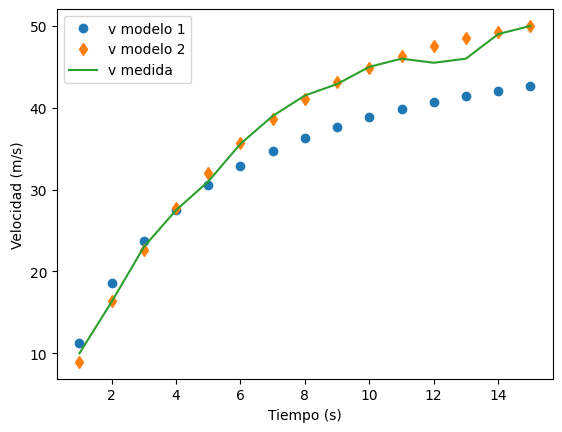

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constantes
g = 9.8  # la aceleración de la gravedad
m = 68.1  # masa del cuerpo
c = 12.5  # coeficiente de arrastre

# Crear un arreglo de tiempo de 1 a 15 segundos
tiempo = np.arange(1, 16)

# Datos de velocidad medida
v_medida = np.array([10.00, 16.30, 23.00, 27.50, 31.00, 35.60, 39.00, 41.50, 42.90, 45.00, 46.00, 45.50, 46.00, 49.00, 50.00])

# Modelo 1 de velocidad
v1 = lambda t: (g * m / c) * (t / (3.75 + t))
v1_modelo = v1(tiempo)

# Modelo 2 de velocidad
v2 = lambda t: (g * m / c) * (1 - np.exp(-c * t / m))
v2_modelo = v2(tiempo)

# Crear una tabla con los modelos de velocidad
tabla_modelo = pd.DataFrame({
    'Tiempo (s)': tiempo,
    'v modelo 1 (m/s)': v1_modelo,
    'v modelo 2 (m/s)': v2_modelo
})

# Mostrar la tabla
print(tabla_modelo)

# Gráfica
plt.figure()
plt.plot(tiempo, v1_modelo, 'o', label='v modelo 1')
plt.plot(tiempo, v2_modelo, 'd', label='v modelo 2')
plt.plot(tiempo, v_medida, '-', label='v medida')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.legend()
plt.show()

Para evaluar el grado de coincidencia entre los modelos y los datos podemos graficar $v_{medida}\; vs\;v_{modelo\,1}$y $v_{medida}\; vs\;v_{modelo\,2}$. El ajuste lineal por medio de una regresión lineal no daría información de la precisión del modelo; de tal forma que los coeficientes de la pendiente y la ordenada al origen deben ser 1 y 0 respectivamente cuando el modelo coincida con la medición y el coeficiente de determinación $r2=1$. Del ajuste de las gráficas, el coeficiente de determinación para cada modelo nos dirá que tan cercano es a la realidad

## Linealización
En ocasiones, encontraremos que los datos no siguen una tendencia lineal por lo que tendremos que modificarlos para que puedan visualizarse como una línea recta.

Ecuación linealizada: log10(y) = -0.3002 + 1.7517*x
Pendiente (b): 1.7517
Intercepto (a): -0.3002
Coeficiente de determinación R²: 1.0000


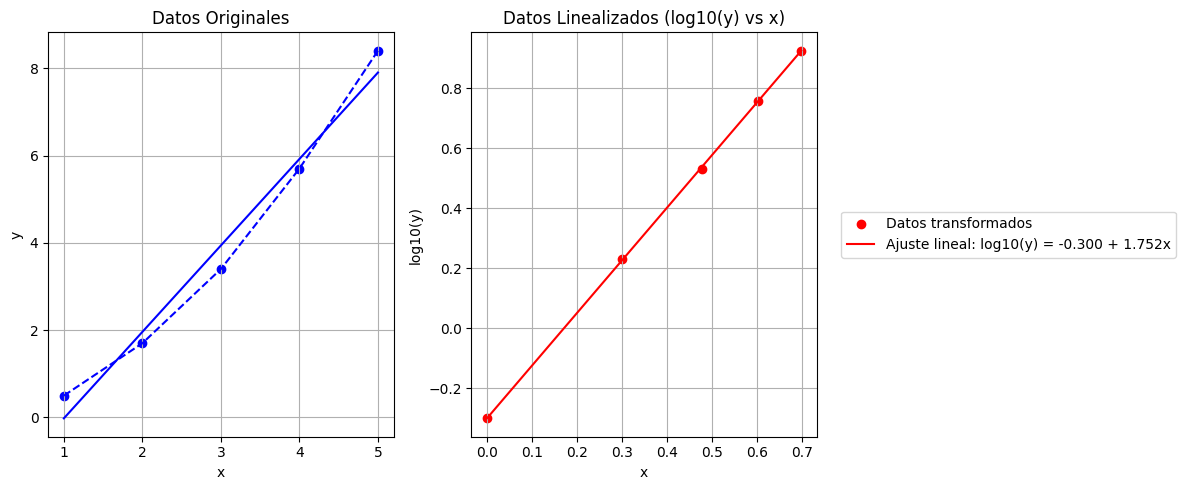

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos de la tabla
x_lineal = np.array([1, 2, 3, 4, 5])
y_lineal = np.array([0.5, 1.7, 3.4, 5.7, 8.4])

# Aplicar transformación logarítmica base 10 a y
x_log = np.log10(x_lineal)
y_log = np.log10(y_lineal)

# 1. Ajuste lineal a los datos NO transformados
result_lineal = linregress(x_lineal, y_lineal)
b_lineal, a_lineal = result_lineal.slope, result_lineal.intercept

# 2. Ajuste lineal a los datos transformados
result_log = linregress(x_log, y_log)
a, b = result_log.intercept, result_log.slope

# Crear figura con dos subgráficas
plt.figure(figsize=(12, 5))

# Subgráfica 1: Datos originales
plt.subplot(1, 2, 1)
plt.scatter(x_lineal, y_lineal, c='b', label='Datos crudos')
plt.plot(x_lineal, a_lineal + b_lineal*x_lineal, 'b-', linewidth=1.5)
plt.plot(x_lineal, y_lineal, 'b--')
plt.title('Datos Originales')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Subgráfica 2: Datos transformados y ajuste lineal
plt.subplot(1, 2, 2)
plt.scatter(x_log, y_log, c='r', label='Datos transformados')
plt.plot(x_log, a + b*x_log, 'r-', linewidth=1.5, 
         label=f'Ajuste lineal: log10(y) = {a:.3f} + {b:.3f}x')
plt.title('Datos Linealizados (log10(y) vs x)')
plt.xlabel('x')
plt.ylabel('log10(y)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

# Mostrar ecuación de ajuste en consola
print(f'Ecuación linealizada: log10(y) = {a:.4f} + {b:.4f}*x')
print(f'Pendiente (b): {b:.4f}')
print(f'Intercepto (a): {a:.4f}')

# Calcular R²
y_log_pred = a + b*x_log
SS_res = np.sum((y_log - y_log_pred)**2)
SS_tot = np.sum((y_log - np.mean(y_log))**2)
R2 = 1 - (SS_res / SS_tot)
print(f'Coeficiente de determinación R²: {R2:.4f}')

# Añadir distribución gaussiana sobre la línea (como en tu ejemplo anterior)
# (Esta parte no estaba en el código MATLAB original pero la mencionaste)
plt.tight_layout()
plt.show()

### Ejemplo (anterior)
El primer modelo usado tiene la forma $v_{1}(t)=\alpha\left(\frac{t}{\beta+t}\right)$. Ahora queremos linealizar este modelo para encontrar el valor de estas constantes. Para el caso de esta función ocuparemos el cambio de variable $t'=\frac{1}{t}$ y $v'(t')=\frac{1}{v(t)}$. De esta sustitución obtenemos que $v'(t)=\frac{1}{\alpha}+\frac{\beta}{\alpha}t'$.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Sustitución
t_prima = 1.0 / tiempo
v_prima = 1.0 / v_medida

# Crear DataFrame para el ajuste lineal
tbl_lin1 = pd.DataFrame({'x': t_prima, 'y': v_prima})

# Ajustar modelo lineal (usando statsmodels)
X = sm.add_constant(tbl_lin1['x'])  # Añade columna de unos para el intercepto
modelo_lin1 = sm.OLS(tbl_lin1['y'], X).fit()

# Extraer coeficientes y R²
b0_lin1 = modelo_lin1.params[0]  # Ordenada al origen
b1_lin1 = modelo_lin1.params[1]  # Pendiente
R2_lin1 = modelo_lin1.rsquared

# Gráfica
plt.figure()
plt.plot(t_prima, modelo_lin1.predict(X), 'b-', label=f'Ajuste lineal: y = {b1_lin1:.2f}x + {b0_lin1:.2f}\nR² = {R2_lin1:.4f}')
plt.plot(t_prima, v_prima, 'g:', linewidth=2, label='Datos')

# Añadir leyenda y formato
plt.legend(loc='best')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Comparación de modelos de velocidad')
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

Y por otro lado, el segundo modelo que se obtiene de desarrollar la ecuacion diferencial es de la forma $v(t)=\alpha(1-e^{\beta t})$. Esta sustitución no es posible hacerla directamente por lo que se necesita conocer un valor estimado de una de la constante  ya que y $z=-\beta t$

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Sustitución
t_prima = tiempo.copy()

# a_estimado = max(v_medida) * 1.05
a_estimado = g * m / c
v_prima = np.log(1 - v_medida / a_estimado)

# Crear DataFrame para el ajuste lineal
tbl_lin2 = pd.DataFrame({'x': t_prima, 'y': v_prima})

# Ajustar modelo lineal (usando statsmodels)
X = sm.add_constant(tbl_lin2['x'])  # Añade columna de unos para el intercepto
modelo_lin2 = sm.OLS(tbl_lin2['y'], X).fit()

# Extraer coeficientes y R²
b0_lin2 = modelo_lin2.params[0]  # Ordenada al origen
b1_lin2 = modelo_lin2.params[1]  # Pendiente
R2_lin2 = modelo_lin2.rsquared

# Gráfica
plt.figure(figsize=(10, 6))
plt.scatter(t_prima, v_prima, color='blue', label='Datos')
plt.plot(t_prima, modelo_lin2.predict(X), 'r-', label='Ajuste lineal')

# Línea punteada verde para el modelo
plt.plot(t_prima, v_prima, 'g:', linewidth=2, 
         label=f'Ajuste 1: y = {b1_lin2:.2f}x + {b0_lin2:.2f}\nR² = {R2_lin2:.4f}')

# Añadir leyenda y formato
plt.legend(loc='best')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Comparación de modelos de velocidad')
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

## Ajuste polinamial
En el caso de que la linealzación no sea la manera mas adecuada para transformar los datos, un ajuste polinomal sería lo mas adecuado. El numero de ecuaciones necesarias para minimizar el orden el error dependerá del grado del polinómino de tal forma que si el modelo tiene una forma
$$y=a_0+a_1x+a_2x^2+...+a_mx^m+e$$
entonces se necesitarían  ecuaciones provenientes de las derivadas $\frac{\partial S_r}{\partial a_0},...\,,\frac{\partial S_r}{\partial a_m}$, de donde la minimización se obteniendo una matriz para el sistema de ecuaciones de $m+1\times m+1$ dimensiones:
$$\left[ \begin{array}{cccc}n & \sum x_i &\cdots& \sum x_i^m \\ 
\sum x_i & \sum x_i^2 &\cdots& \sum x_i^{m+1} \\
\vdots&\vdots&\ddots&\vdots\\ 
\sum x_i^m & \sum x_i^{m+1} &\cdots& \sum x_i^{m^2} \end{array} \right]
\left(\begin{array}{c}
a_0\\
a_1\\
\vdots\\
a_m
\end{array}\right)=
\left(\begin{array}{c}
\sum y_i \\ 
\sum x_iy_i \\
\vdots\\ 
\sum x_i^my_i 
\end{array}\right)$$
que es posible resolverla usando el método de Gauss-Jordan. Este problema está resuelto con la función polifit. 

## Regresión lineal múltiple
Cuando se tienen mas de una variable también es posible realizar una regresión lineal para ajustar un plano a los puntos.

### Ejemplo

Tabla de datos:
    x1  x2   y
0  0.0   0   5
1  2.0   1  10
2  2.5   2   9
3  1.0   3   0
4  4.0   6   3
5  7.0   2  27

Matriz de diseño A:
[[1.  0.  0. ]
 [1.  2.  1. ]
 [1.  2.5 2. ]
 [1.  1.  3. ]
 [1.  4.  6. ]
 [1.  7.  2. ]]
Vector b:
[[ 5]
 [10]
 [ 9]
 [ 0]
 [ 3]
 [27]]

Sumas:
   n   Σx1  Σx2  Σy   Σx1²  Σx1x2   Σx1y  Σx2²  Σx2y
0  6  16.5   14  54  76.25   48.0  243.5    54   100

Sistema de ecuaciones normales (M * coef = c):
Matriz M:
[[ 6.   16.5  14.  ]
 [16.5  76.25 48.  ]
 [14.   48.   54.  ]]
Vector c:
[ 54.  243.5 100. ]

Coeficientes del plano (a0, a1, a2):
[ 5.  4. -3.]


Ecuación del plano ajustado:
y = 5.0000 + 4.0000*x1 + -3.0000*x2
Error cuadrático medio: 0.0000


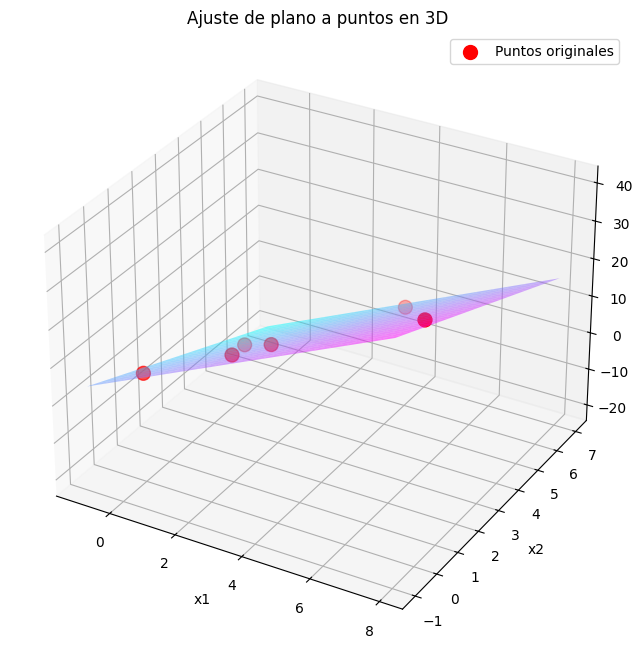

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos de entrada
x1 = np.array([0, 2, 2.5, 1, 4, 7]).reshape(-1, 1)
x2 = np.array([0, 1, 2, 3, 6, 2]).reshape(-1, 1)
y = np.array([5, 10, 9, 0, 3, 27]).reshape(-1, 1)

# Mostrar los datos en forma de tabla
datos = pd.DataFrame({'x1': x1.flatten(), 'x2': x2.flatten(), 'y': y.flatten()})
print("Tabla de datos:")
print(datos)
print()

# Construir la matriz de diseño A y el vector b
A = np.hstack([np.ones_like(x1), x1, x2])
b = y

# Mostrar las matrices
print('Matriz de diseño A:')
print(A)
print('Vector b:')
print(b)
print()

# Calcular las sumas necesarias
n = len(x1)
sum_x1 = np.sum(x1)
sum_x2 = np.sum(x2)
sum_y = np.sum(y)
sum_x1x1 = np.sum(x1**2)
sum_x1x2 = np.sum(x1 * x2)
sum_x1y = np.sum(x1 * y)
sum_x2x2 = np.sum(x2**2)
sum_x2y = np.sum(x2 * y)

# Mostrar las sumas
sumas = pd.DataFrame({
    'n': [n],
    'Σx1': [sum_x1],
    'Σx2': [sum_x2],
    'Σy': [sum_y],
    'Σx1²': [sum_x1x1],
    'Σx1x2': [sum_x1x2],
    'Σx1y': [sum_x1y],
    'Σx2²': [sum_x2x2],
    'Σx2y': [sum_x2y]
})
print("Sumas:")
print(sumas)
print()

# Construir el sistema de ecuaciones normales
M = np.array([
    [n, sum_x1, sum_x2],
    [sum_x1, sum_x1x1, sum_x1x2],
    [sum_x2, sum_x1x2, sum_x2x2]
])

c = np.array([sum_y, sum_x1y, sum_x2y]).flatten()

# Mostrar el sistema de ecuaciones normales
print('Sistema de ecuaciones normales (M * coef = c):')
print('Matriz M:')
print(M)
print('Vector c:')
print(c)
print()

# Resolver el sistema para obtener los coeficientes
coef = np.linalg.solve(M, c)

# Mostrar los coeficientes del plano
print('Coeficientes del plano (a0, a1, a2):')
print(coef)
print()

# Ecuación del plano: y = a0 + a1*x1 + a2*x2
a0, a1, a2 = coef

print('\nEcuación del plano ajustado:')
print(f'y = {a0:.4f} + {a1:.4f}*x1 + {a2:.4f}*x2')

# Calcular los valores predichos
y_pred = a0 + a1*x1 + a2*x2

# Calcular el error cuadrático medio
mse = np.mean((y - y_pred)**2)
print(f'Error cuadrático medio: {mse:.4f}')

# Graficar los puntos y el plano ajustado
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos originales
ax.scatter(x1, x2, y, c='r', s=100, label='Puntos originales')

# Crear malla para el plano
x1_grid = np.linspace(min(x1)-1, max(x1)+1, 20)
x2_grid = np.linspace(min(x2)-1, max(x2)+1, 20)
x1_mesh, x2_mesh = np.meshgrid(x1_grid, x2_grid)
y_grid = a0 + a1*x1_mesh + a2*x2_mesh

# Graficar el plano
ax.plot_surface(x1_mesh, x2_mesh, y_grid, alpha=0.5, cmap='cool')

# Etiquetas y título
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Ajuste de plano a puntos en 3D')
ax.legend()
plt.grid(True)
plt.show()

# Ejercicio
De los datos proporcionados, calcula la aceleración y desaceleración promedio del metro entre dos estaciones.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

# URL del archivo en GitHub
url = "https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/717fb51a62058a2968f76f8eea982ab7080e4252/Clases/aceleracion.dat"

# Descargar el contenido del archivo (usando el enlace raw)
raw_url = "https://raw.githubusercontent.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/717fb51a62058a2968f76f8eea982ab7080e4252/Clases/aceleracion.dat"
response = requests.get(raw_url)
data = response.text

# Leer los datos con numpy
# Usamos StringIO para simular un archivo en memoria
x, y, z = np.loadtxt(StringIO(data), unpack=True)

# Ahora puedes graficar las componentes
plt.figure(figsize=(10, 6))

plt.plot(x, label='Componente X', alpha=0.7)
plt.plot(y, label='Componente Y', alpha=0.7)
plt.plot(z, label='Componente Z', alpha=0.7)

plt.title('Componentes de Aceleración')
plt.xlabel('Muestra')
plt.ylabel('Aceleración')
plt.legend()
plt.grid(True)
plt.show()